<a href="https://colab.research.google.com/github/siddharth-0426/DL/blob/main/Cat_vs_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 161MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators- Divide the data into batches, and once a batch has been worked on, the next batch is loaded into RAM.

train=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

test=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train=train.map(process)
test=test.map(process)


In [ ]:
#create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6516 - accuracy: 0.6734 - val_loss: 1.4380 - val_accuracy: 0.6194
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5436 - accuracy: 0.7382 - val_loss: 0.6024 - val_accuracy: 0.7048
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4731 - accuracy: 0.7743 - val_loss: 0.4999 - val_accuracy: 0.7626
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4197 - accuracy: 0.8087 - val_loss: 0.4424 - val_accuracy: 0.7998
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3698 - accuracy: 0.8331 - val_loss: 0.5250 - val_accuracy: 0.7618
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3155 - accuracy: 0.8558 - val_loss: 0.7556 - val_accuracy: 0.7482
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2586 - accuracy: 0.8827 - val_loss: 0.5156 - val_ac

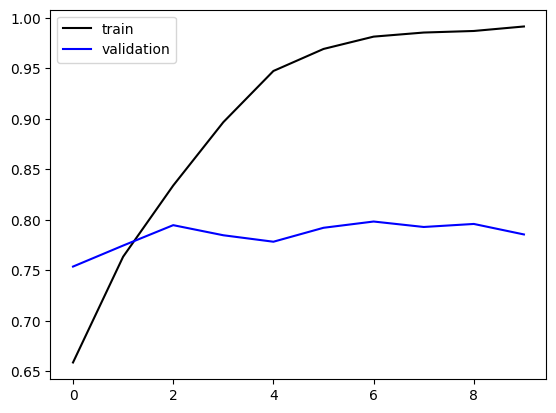

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='black',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#below graph shows initial overfitting

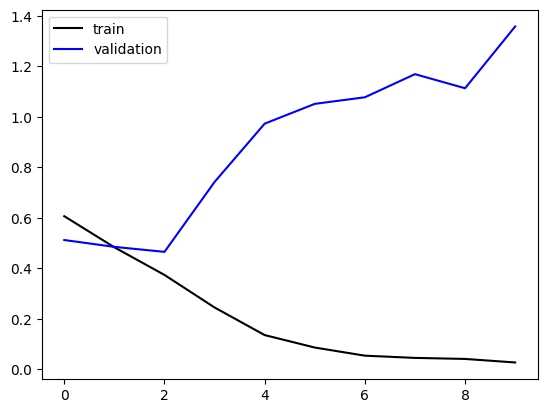

In [ ]:
plt.plot(history.history['loss'],color='black',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#below graph shows loss

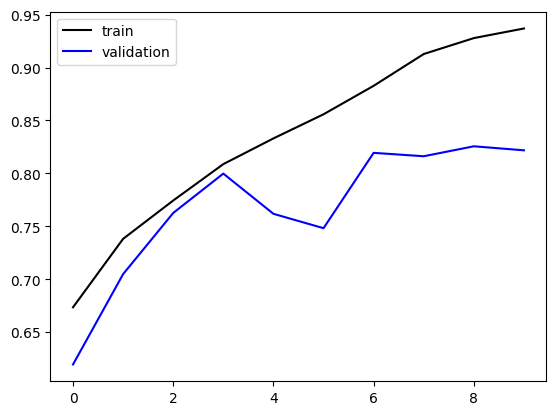

In [ ]:
# After applying dropout and Batch Normalization layers
plt.plot(history.history['accuracy'],color='black',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

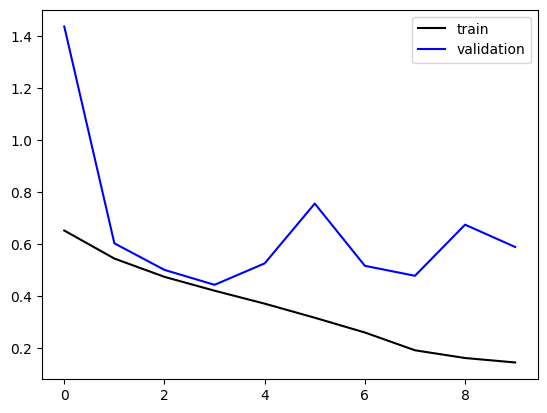

In [ ]:
plt.plot(history.history['loss'],color='black',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/test_image.jpeg')

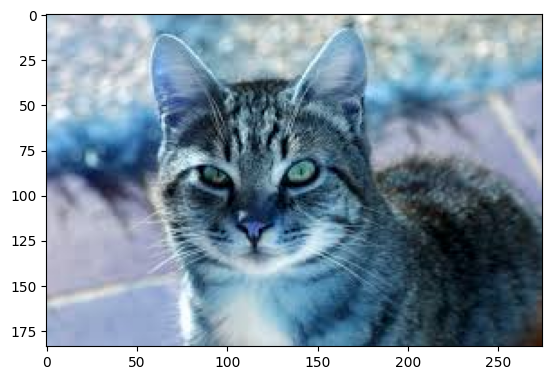

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_img=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_img) #correctly assingns to cat(0)

1/1 [==============================] - 1s 696ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img1=cv2.imread('/content/test_image1.jpeg')

In [ ]:
test_img1=cv2.resize(test_img1,(256,256))

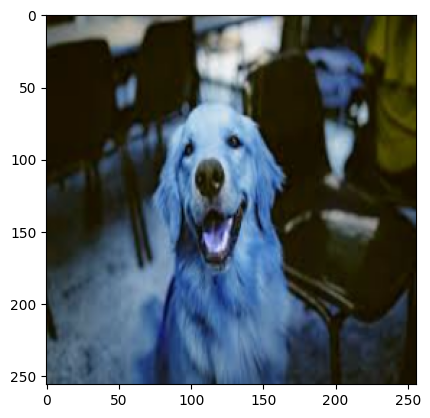

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1=test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_img1) #correctly predicted dog(1)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)